In [1]:
# Approach borrowed from:
# https://github.com/hongcheng79/deep-learning/blob/master/kaggle/titanic/Titanic%20-%20TensorFlow%20(keras).ipynb
# https://www.kaggle.com/ledadel/titanic-survivorship-neural-network-model/notebook
# https://www.kaggle.com/rebordao/sinking-of-the-titanic-from-data-to-insights
# https://github.com/RCubo/Titanic-Keras/blob/master/titanic_keras.py
# https://github.com/ikanez/kaggle-titanic 


In [2]:
from __future__ import print_function
# Matplotlib for additional customization
from matplotlib import pyplot as plt
import missingno as msno
%matplotlib inline

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils

sns.set(style="whitegrid")

Using TensorFlow backend.


In [4]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

display(train_data.head())
display(test_data.head())
print("Length of train_data : {}".format(len(train_data)))
print("Lenght of test_data : {}".format(len(test_data)))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Length of train_data : 891
Lenght of test_data : 418


In [5]:
# Save passengerid from train data
test_passenger_id = test_data['PassengerId']

In [6]:
# Store train data outcome
outcomes = train_data['Survived']
train_data = train_data.drop('Survived', axis=1)

In [7]:
train_data['test'] = 0
test_data['test'] = 1
full_data = pd.concat([train_data, test_data])
print("Length of full data : {}".format(len(full_data)))
print("Length of train_data : {}".format(len(train_data)))
print("Lenght of test_data : {}".format(len(test_data)))
display(full_data.head())
display(full_data.tail())

Length of full data : 1309
Length of train_data : 891
Lenght of test_data : 418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,test
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,test
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,1


In [8]:
original_train_data = pd.read_csv('data/train.csv')
print(original_train_data.isnull().sum())
print("<--- Train Data --->")
print(train_data.isnull().sum())
print("<--- Test Data --->")
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<--- Train Data --->
PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
test             0
dtype: int64
<--- Test Data --->
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
test             0
dtype: int64


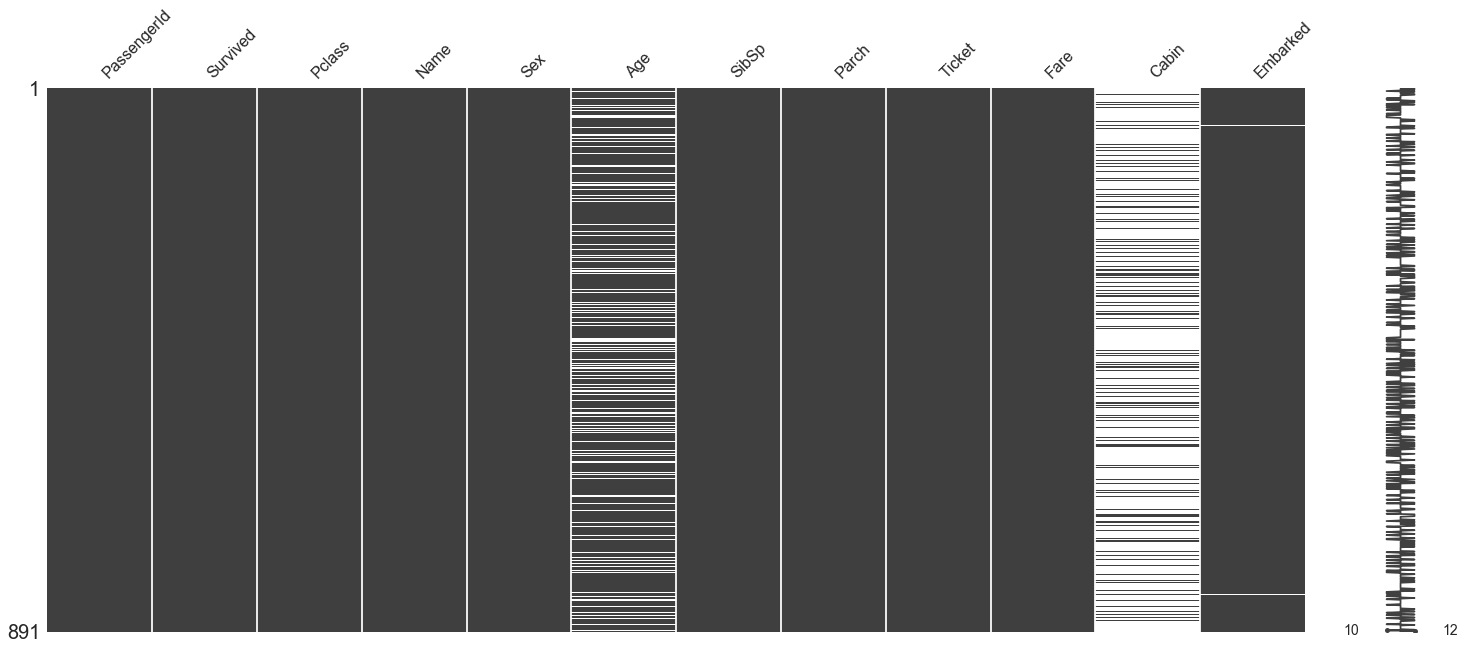

In [9]:
msno.matrix(original_train_data)

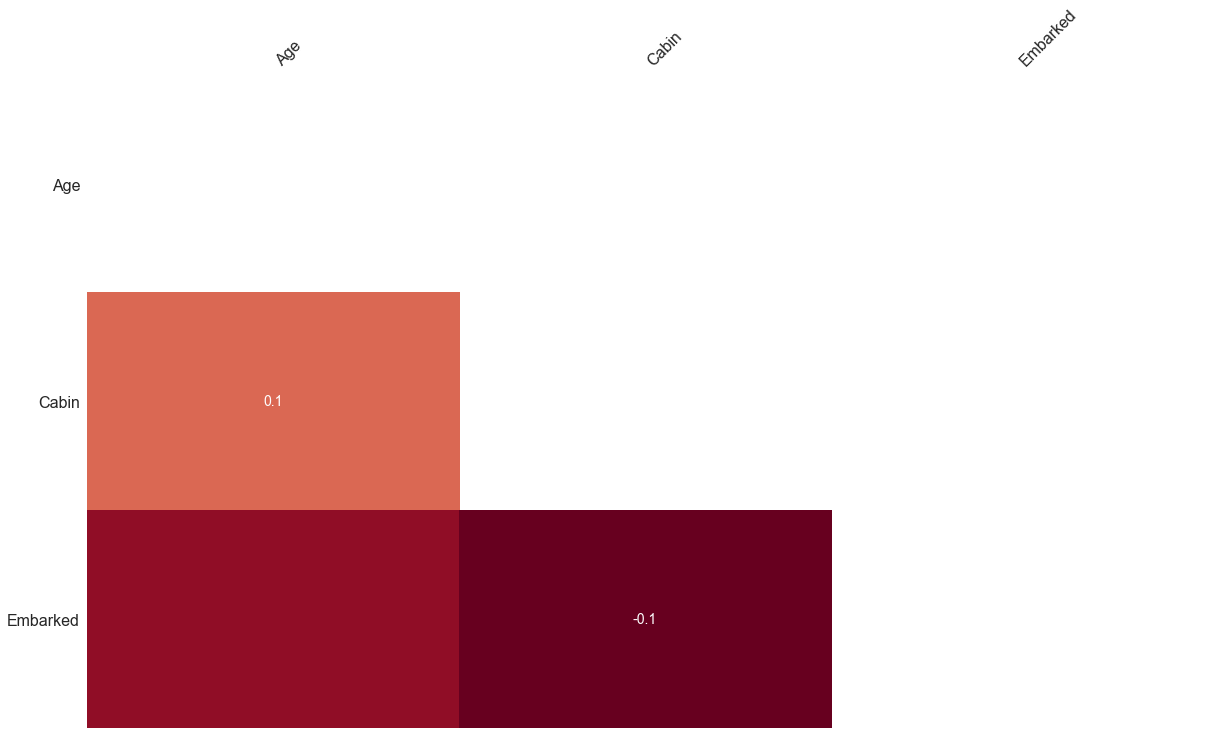

In [10]:
msno.heatmap(original_train_data)

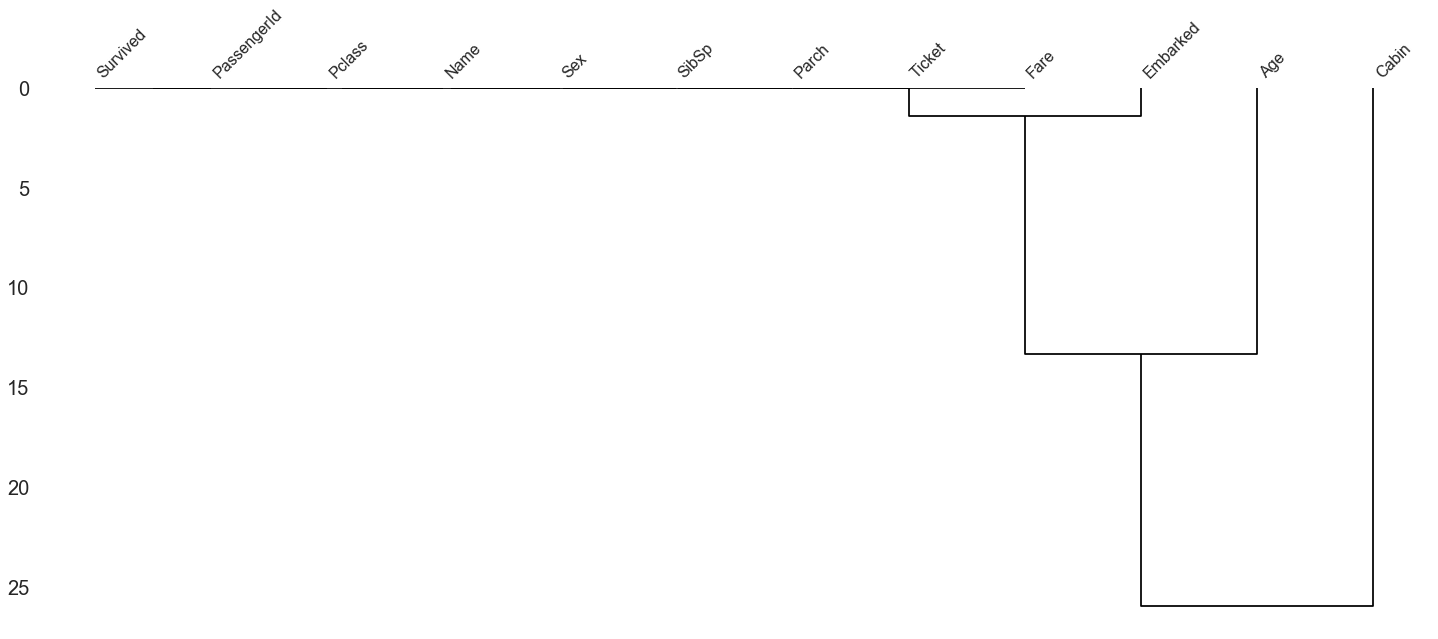

In [11]:
msno.dendrogram(original_train_data)

In [12]:
original_train_data[original_train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
original_train_data[original_train_data.Ticket.str.startswith('113')].sort_values(['Ticket'], ascending=[True])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
711,712,0,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.5500,C124,S
331,332,0,1,"Partner, Mr. Austen",male,45.50,0,0,113043,28.5000,C124,S
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.00,0,0,113050,26.5500,B38,S
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.00,0,0,113051,27.7500,C111,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.00,0,0,113055,26.5500,E17,S
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
83,84,0,1,"Carrau, Mr. Francisco M",male,28.00,0,0,113059,47.1000,NaN,S
782,783,0,1,"Long, Mr. Milton Clyde",male,29.00,0,0,113501,30.0000,D6,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.00,0,2,113503,211.5000,C82,C
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S


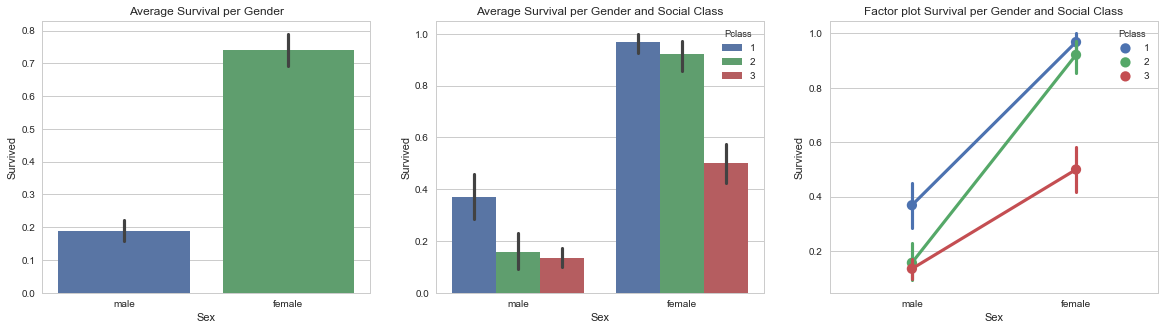

In [14]:
f, (g1, g2, g3) = plt.subplots(1, 3, figsize=(20,5))
sns.barplot(x="Sex", y="Survived", data=original_train_data, ax=g1).set_title("Average Survival per Gender");
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=original_train_data, ax=g2).set_title("Average Survival per Gender and Ticket Class");
sns.pointplot(x="Sex", y="Survived", hue="Pclass", data=original_train_data, ax=g3).set_title("Factor plot Survival per Gender and Ticket Class");

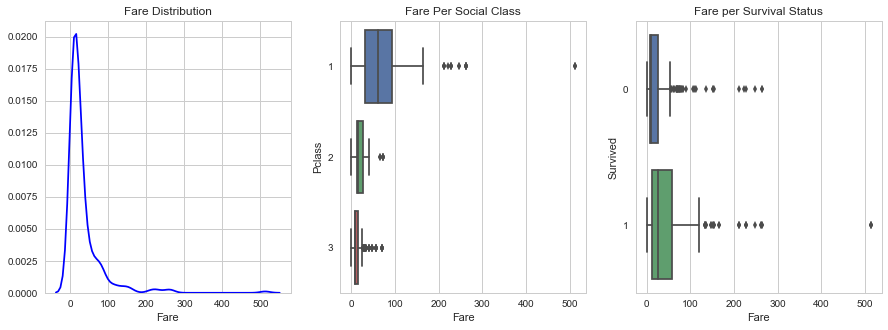

In [15]:
f, (g1, g2, g3) = plt.subplots(1, 3, figsize=(15,5))
sns.distplot(original_train_data.Fare.dropna(), ax=g1, hist=False, color='b').set_title("Fare Distribution");
sns.boxplot(x='Fare', y='Pclass',data=original_train_data, orient='h', ax=g2).set_title("Fare Per Ticket Class");
sns.boxplot(x='Fare', y='Survived', data=original_train_data, orient='h', ax=g3).set_title("Fare per Survival Status");

In [16]:
original_train_data.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [17]:
original_train_data.groupby('Embarked')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,168.0,59.954144,83.912994,4.0125,13.69795,29.70,78.500025,512.3292
Q,77.0,13.276030,14.188047,6.7500,7.75000,7.75,15.500000,90.0000
S,644.0,27.079812,35.887993,0.0000,8.05000,13.00,27.900000,263.0000


In [18]:
full_data['Cabin'].fillna('X', inplace=True)
full_data['Deck'] = full_data['Cabin'].str[0]
full_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         2
test             0
Deck             0
dtype: int64

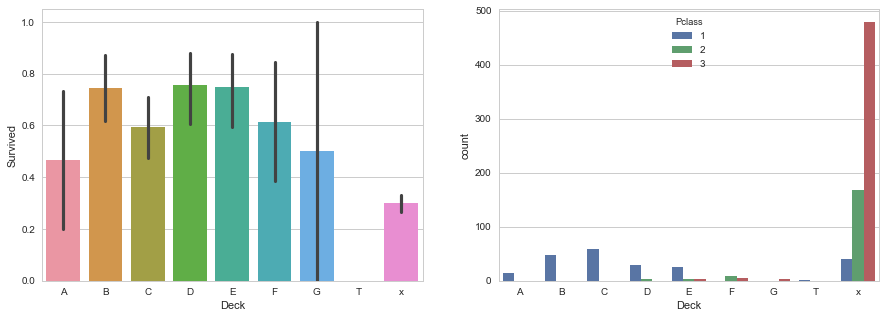

In [19]:
fill_cabin = original_train_data['Cabin'].fillna('x', inplace=True)

cabin_not_null = original_train_data[~original_train_data.Cabin.isnull()].copy()

cabin_not_null['Deck'] = cabin_not_null['Cabin'].str[0]

f, (g1, g2) = plt.subplots(1, 2, figsize=(15,5))

sns.barplot(x='Deck', y='Survived', data=cabin_not_null, order=sorted(cabin_not_null.Deck.unique()), ax=g1);

sns.countplot(x='Deck', hue='Pclass', data=cabin_not_null, order=sorted(cabin_not_null.Deck.unique()), ax=g2);

In [20]:
full_data[full_data.Embarked.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,test,Deck
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,B
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,B


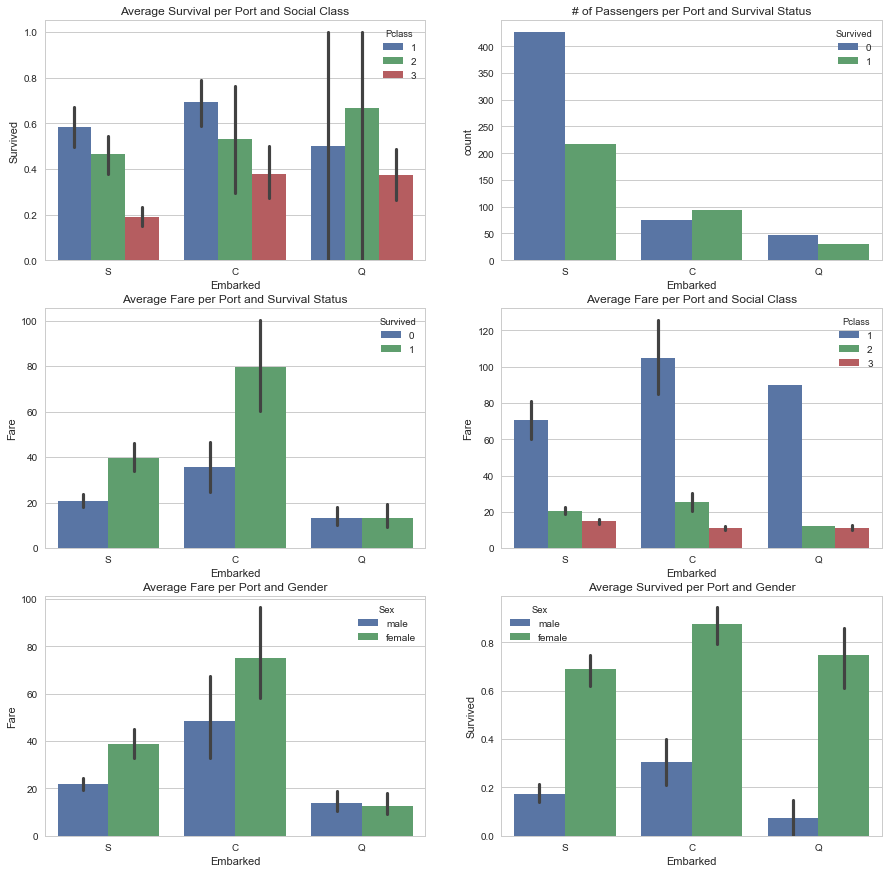

In [21]:
f, ((g1, g2), (g3, g4), (g5, g6)) = plt.subplots(3, 2, figsize=(15,15))

sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=original_train_data, ax=g1).set_title(
    "Average Survival per Port and Ticket Class");

sns.countplot(x='Embarked', hue='Survived', data=original_train_data, ax=g2).set_title(
    "# of Passengers per Port and Survival Status");

sns.barplot(x='Embarked', y='Fare', hue='Survived', data=original_train_data, ax=g3).set_title(
    "Average Fare per Port and Survival Status");

sns.barplot(x='Embarked', y='Fare', hue='Pclass', data=original_train_data, ax=g4).set_title(
    "Average Fare per Port and Ticket Class");

sns.barplot(x='Embarked', y='Fare', hue='Sex', data=original_train_data, ax=g5).set_title(
    "Average Fare per Port and Gender");

sns.barplot(x='Embarked', y='Survived', hue='Sex', data=original_train_data, ax=g6).set_title(
    "Average Survived per Port and Gender");

In [22]:
#Based on Chart Average Fare per Port and Gender, we can assume that missing embarked with Fare 80 is coming from C

In [23]:
full_data['Embarked'].fillna('C', inplace=True)
full_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         0
test             0
Deck             0
dtype: int64

In [24]:
full_data[full_data.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,test,Deck
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,X,S,1,X


In [25]:
embarked_s_class3_avg = full_data.query("Embarked == 'S' and Pclass == 3")['Fare'].describe()
display(embarked_s_class3_avg)

count    494.000000
mean      14.435422
std       13.118281
min        0.000000
25%        7.854200
50%        8.050000
75%       15.900000
max       69.550000
Name: Fare, dtype: float64

In [26]:
# Replace null Fare with calculated mean
full_data['Fare'].fillna(embarked_s_class3_avg['mean'], inplace=True)
full_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
test             0
Deck             0
dtype: int64

In [27]:
full_data['Title'] = full_data.Name.apply(lambda s: s.split(',')[1].split('.')[0])
display(full_data['Title'].value_counts())

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Ms                2
 Mlle              2
 Major             2
 Mme               1
 Don               1
 Jonkheer          1
 Capt              1
 Dona              1
 Sir               1
 the Countess      1
 Lady              1
Name: Title, dtype: int64

In [28]:
full_data['Title'] = pd.DataFrame(full_data.Name.apply(lambda s: s.split(',')[1].split('.')[0].strip(' ')).rename('title'))
changes = {
    'Mlle': 'Miss', 
    'Mme': 'Mrs', 
    'Ms': 'Miss',
    'Rev': 'Priest',
    'Sir': 'Noble', 
    'Lady': 'Noble', 
    'the Countess': 'Noble', 
    'Jonkheer': 'Noble', 
    'Don': 'Noble', 
    'Dona': 'Noble',
    'Major': 'Military', 
    'Capt': 'Military', 
    'Col': 'Military'}
full_data['Title'].replace(changes, inplace=True)
print(full_data.Title.value_counts())

Mr          757
Miss        264
Mrs         198
Master       61
Priest        8
Dr            8
Military      7
Noble         6
Name: Title, dtype: int64


In [29]:
original_train_data['Title'] = pd.DataFrame(original_train_data.Name.apply(lambda s: s.split(',')[1].split('.')[0].strip(' ')).rename('title'))
original_train_data['Title'].replace(changes, inplace=True)
print(original_train_data.Title.value_counts())

Mr          517
Miss        185
Mrs         126
Master       40
Dr            7
Priest        6
Military      5
Noble         5
Name: Title, dtype: int64


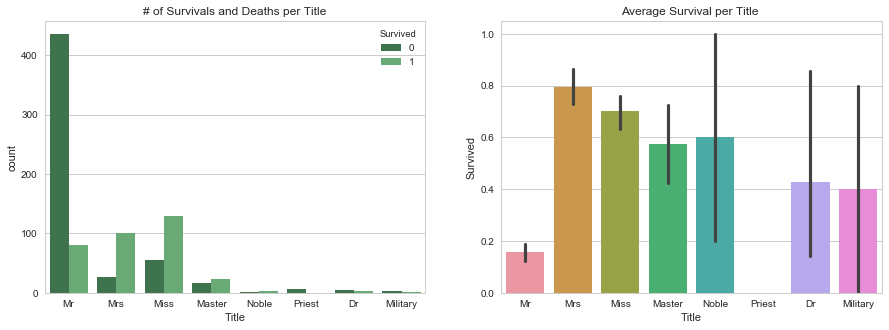

In [30]:
f, (g1, g2) = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='Title', hue='Survived', data=original_train_data, palette="Greens_d", ax=g1).set_title(
    '# of Survivals and Deaths per Title');

sns.barplot(x='Title', y='Survived', data=original_train_data, ax=g2).set_title("Average Survival per Title ");

In [31]:
before_age_predict = full_data.copy()
predictors = ['Fare', 'Parch', 'Pclass', 'SibSp','Age', 'Sex', 'Title']
age_train = full_data.loc[~full_data.Age.isnull(), predictors]
age_test = full_data.loc[full_data.Age.isnull(), predictors]
gender_changes = {'male':0, 'female':1}
title_changes = {'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Priest':4,'Dr':5,'Military':6,'Noble':7}
age_train['Sex'].replace(gender_changes, inplace=True)
age_test['Sex'].replace(gender_changes, inplace=True)
age_train['Title'].replace(title_changes, inplace=True)
age_test['Title'].replace(title_changes, inplace=True)
display(age_train.head())
display(age_test.head())

,Fare,Parch,Pclass,SibSp,Age,Sex,Title
0,7.2500,0,3,1,22.0,0,0
1,71.2833,0,1,1,38.0,1,2
2,7.9250,0,3,0,26.0,1,1
3,53.1000,0,1,1,35.0,1,2
4,8.0500,0,3,0,35.0,0,0


,Fare,Parch,Pclass,SibSp,Age,Sex,Title
5,8.4583,0,3,0,NaN,0,0
17,13.0000,0,2,0,NaN,0,0
19,7.2250,0,3,0,NaN,1,2
26,7.2250,0,3,0,NaN,0,0
28,7.8792,0,3,0,NaN,1,1


In [32]:
lm = LinearRegression()
lm.fit(age_train.drop('Age', axis=1), age_train['Age'], )
predicted_age = lm.predict(age_test.drop('Age', axis=1))
full_data.loc[full_data.Age.isnull(), 'Age'] = predicted_age
full_data.isnull().sum()

/Users/edmund/.virtualenvs/dt-py3/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
test           0
Deck           0
Title          0
dtype: int64

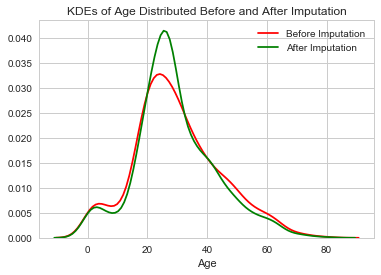

In [33]:
sns.distplot(before_age_predict.Age.dropna(), hist=False, color='r', label='Before Imputation');
sns.distplot(full_data.Age, hist=False, color='g', label='After Imputation').set_title(
    "KDEs of Age Distributed Before and After Imputation");

In [34]:
gender_changes = {'male':0, 'female':1}
title_changes = {'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Priest':4,'Dr':5,'Military':6,'Noble':7}
deck_changes = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7,'X':8}
embarked_changes = {'S':0,'C':1,'Q':2}
full_data['Sex'].replace(gender_changes, inplace=True)
full_data['Title'].replace(title_changes, inplace=True)
full_data['Deck'].replace(deck_changes, inplace=True)
full_data['Embarked'].replace(embarked_changes, inplace=True)
display(full_data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,test,Deck,Title
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,X,0,0,8,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,2,2
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,X,0,0,8,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,2,2
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,X,0,0,8,0


In [35]:
trim_data = full_data.drop(['PassengerId','Name','Ticket','Cabin','Deck'],axis = 1)
display(trim_data.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,test,Title
0,3,0,22.0,1,0,7.2500,0,0,0
1,1,1,38.0,1,0,71.2833,1,0,2
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,2
4,3,0,35.0,0,0,8.0500,0,0,0


In [36]:
train_data = trim_data[trim_data['test'] == 0]
test_data = trim_data[trim_data['test'] == 1]
print("Length of train data : {}".format(len(train_data)))
print("Length of test data : {}".format(len(test_data)))

# Remove test column
train_data = train_data.drop(['test'], axis=1)
test_data = test_data.drop(['test'], axis=1)

display(train_data.head())
display(test_data.head())

Length of train data : 891
Length of test data : 418


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,22.0,1,0,7.2500,0,0
1,1,1,38.0,1,0,71.2833,1,2
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,2
4,3,0,35.0,0,0,8.0500,0,0


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,2,0
1,3,1,47.0,1,0,7.0000,0,2
2,2,0,62.0,0,0,9.6875,2,0
3,3,0,27.0,0,0,8.6625,0,0
4,3,1,22.0,1,1,12.2875,0,2


In [37]:
def build_model():
    # This will reset all parameters and variables
    tf.reset_default_graph()
    # Define ANN
    ann_model = Sequential()
    
    #Layers of the ANN (Dense in this case)
    ann_model.add(Dense(128, input_dim=8, activation='sigmoid'))
    ann_model.add(Dense(128, input_dim=30, activation='sigmoid'))
    ann_model.add(Dense(1, input_dim=8, activation='sigmoid'))
    ann_model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
    return ann_model

In [38]:
#Build the model and saving as a variable 'model'
model = build_model()

In [39]:
train_data=np.array(train_data)
labels_data=np.array(outcomes)

In [40]:
model.fit(train_data, labels_data,
              nb_epoch=500,
              verbose=2)

/Users/edmund/.virtualenvs/dt-py3/lib/python3.5/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/500
0s - loss: 0.6248 - acc: 0.6667
Epoch 2/500
0s - loss: 0.6005 - acc: 0.6824
Epoch 3/500
0s - loss: 0.5900 - acc: 0.6936
Epoch 4/500
0s - loss: 0.5793 - acc: 0.7048
Epoch 5/500
0s - loss: 0.5667 - acc: 0.6992
Epoch 6/500
0s - loss: 0.5538 - acc: 0.7160
Epoch 7/500
0s - loss: 0.5356 - acc: 0.7250
Epoch 8/500
0s - loss: 0.5248 - acc: 0.7441
Epoch 9/500
0s - loss: 0.5081 - acc: 0.7609
Epoch 10/500
0s - loss: 0.4930 - acc: 0.7654
Epoch 11/500
0s - loss: 0.4784 - acc: 0.7845
Epoch 12/500
0s - loss: 0.4789 - acc: 0.7868
Epoch 13/500
0s - loss: 0.4686 - acc: 0.7935
Epoch 14/500
0s - loss: 0.4676 - acc: 0.7912
Epoch 15/500
0s - loss: 0.4612 - acc: 0.8070
Epoch 16/500
0s - loss: 0.4591 - acc: 0.8013
Epoch 17/500
0s - loss: 0.4597 - acc: 0.8092
Epoch 18/500
0s - loss: 0.4540 - acc: 0.8070
Epoch 19/500
0s - loss: 0.4521 - acc: 0.8058
Epoch 20/500
0s - loss: 0.4466 - acc: 0.8114
Epoch 21/500
0s - loss: 0.4485 - acc: 0.8103
Epoch 22/500
0s - loss: 0.4436 - acc: 0.8137
Epoch 23/500
0s - l

0s - loss: 0.3802 - acc: 0.8350
Epoch 185/500
0s - loss: 0.3818 - acc: 0.8418
Epoch 186/500
0s - loss: 0.3821 - acc: 0.8249
Epoch 187/500
0s - loss: 0.3802 - acc: 0.8429
Epoch 188/500
0s - loss: 0.3735 - acc: 0.8406
Epoch 189/500
0s - loss: 0.3791 - acc: 0.8384
Epoch 190/500
0s - loss: 0.3809 - acc: 0.8429
Epoch 191/500
0s - loss: 0.3784 - acc: 0.8350
Epoch 192/500
0s - loss: 0.3754 - acc: 0.8406
Epoch 193/500
0s - loss: 0.3801 - acc: 0.8373
Epoch 194/500
0s - loss: 0.3829 - acc: 0.8283
Epoch 195/500
0s - loss: 0.3797 - acc: 0.8339
Epoch 196/500
0s - loss: 0.3803 - acc: 0.8272
Epoch 197/500
0s - loss: 0.3758 - acc: 0.8406
Epoch 198/500
0s - loss: 0.3761 - acc: 0.8395
Epoch 199/500
0s - loss: 0.3777 - acc: 0.8339
Epoch 200/500
0s - loss: 0.3841 - acc: 0.8339
Epoch 201/500
0s - loss: 0.3792 - acc: 0.8350
Epoch 202/500
0s - loss: 0.3775 - acc: 0.8373
Epoch 203/500
0s - loss: 0.3813 - acc: 0.8316
Epoch 204/500
0s - loss: 0.3804 - acc: 0.8429
Epoch 205/500
0s - loss: 0.3824 - acc: 0.8373
Ep

0s - loss: 0.3561 - acc: 0.8519
Epoch 366/500
0s - loss: 0.3544 - acc: 0.8418
Epoch 367/500
0s - loss: 0.3527 - acc: 0.8462
Epoch 368/500
0s - loss: 0.3517 - acc: 0.8530
Epoch 369/500
0s - loss: 0.3529 - acc: 0.8462
Epoch 370/500
0s - loss: 0.3495 - acc: 0.8541
Epoch 371/500
0s - loss: 0.3561 - acc: 0.8507
Epoch 372/500
0s - loss: 0.3449 - acc: 0.8563
Epoch 373/500
0s - loss: 0.3519 - acc: 0.8507
Epoch 374/500
0s - loss: 0.3533 - acc: 0.8552
Epoch 375/500
0s - loss: 0.3551 - acc: 0.8552
Epoch 376/500
0s - loss: 0.3508 - acc: 0.8519
Epoch 377/500
0s - loss: 0.3539 - acc: 0.8541
Epoch 378/500
0s - loss: 0.3463 - acc: 0.8586
Epoch 379/500
0s - loss: 0.3557 - acc: 0.8586
Epoch 380/500
0s - loss: 0.3511 - acc: 0.8541
Epoch 381/500
0s - loss: 0.3504 - acc: 0.8519
Epoch 382/500
0s - loss: 0.3525 - acc: 0.8474
Epoch 383/500
0s - loss: 0.3532 - acc: 0.8507
Epoch 384/500
0s - loss: 0.3468 - acc: 0.8597
Epoch 385/500
0s - loss: 0.3489 - acc: 0.8519
Epoch 386/500
0s - loss: 0.3586 - acc: 0.8474
Ep

In [41]:
predictions = model.predict_classes(np.array(test_data))

passenger_id=test_passenger_id.copy()
evaluation=passenger_id.to_frame()
evaluation["Survived"]=predictions
evaluation[:10]

 32/418 [=>............................] - ETA: 0s

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [42]:
# Write the solution to file
evaluation.to_csv("edmund_submission.csv",index=False)